In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

x = x[y < 2, :2]
y = y[y < 2]

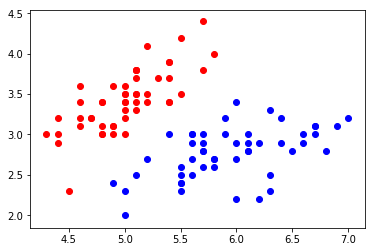

In [4]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], color='r')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='b')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(x)
x_standard = standardScaler.transform(x)

In [6]:
from sklearn.svm import LinearSVC, SVC

svc = LinearSVC(C=1e9)
svc.fit(x_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [7]:
svc.coef_

array([[ 4.03241521, -2.50701448]])

In [8]:
svc.intercept_

array([0.92734461])

In [9]:
x, y = datasets.make_moons()

In [10]:
x.shape

(100, 2)

In [11]:
y.shape

(100,)

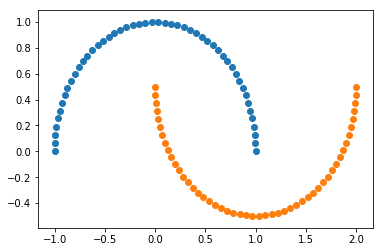

In [12]:
plt.scatter(x[y == 0, 0], x[y == 0, 1])
plt.scatter(x[y == 1, 0], x[y == 1, 1])
plt.show()

In [13]:
x, y = datasets.make_moons(noise=0.15, random_state=666)

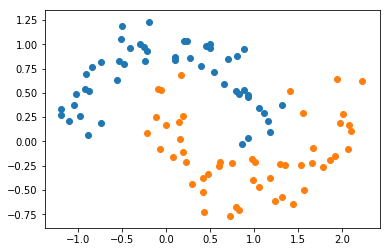

In [14]:
plt.scatter(x[y == 0, 0], x[y == 0, 1])
plt.scatter(x[y == 1, 0], x[y == 1, 1])
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('kernelSVC', SVC(kernel='poly', degree=degree, C=C))
    ])

In [19]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(x, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [23]:
def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('kernelSVC', SVC(kernel='rbf', gamma=gamma))
    ])

In [24]:
svc = RBFKernelSVC()
svc.fit(x, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [27]:
boston = datasets.load_boston()
x = boston.data
y = boston.target

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

In [30]:
from sklearn.svm import LinearSVR, SVR

def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('linearSVR', LinearSVR(epsilon=epsilon))
    ])

In [31]:
svr = StandardLinearSVR()
svr.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVR', LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [33]:
svr.score(x_test, y_test)

0.6356206723711701